## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-28 03:31:30--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-28 03:31:30--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-28 03:31:30 (31.3 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-28 03:31:30--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (gi

In [2]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  X = np.load(path_X)
  y = np.load(path_y)

  return X, y

In [3]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  D = X.shape[1]
  out_shape = 1
  
  W = np.random.randn(D, out_shape)

  return W

In [4]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  m = y.shape[0]
  error = np.sum((y-y_pred)**2)/(2*m)

  return error

In [5]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  W = np.linalg.inv(X.T@X)@X.T@y

  return W

In [6]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  j=[]
  m = y.shape[0]
  theta = get_linear_model(X,y)
  for i in range(epochs):
    yp = X@theta
    j.append(MSE(y,yp))
    theta-=lr*(np.sum((yp-y)*X))/m

  error_hist = j
  W = theta

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

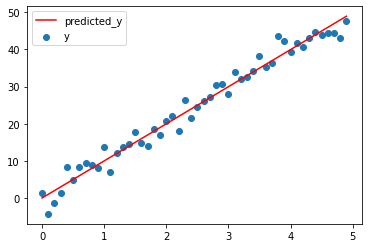

2.7450299103219113


In [7]:
X,y = load_data_LR()
W = train_by_algebra(X,y)
yp = X@W

plt.scatter(X,y,label='y')
plt.plot(X,yp,label='predicted_y', color='red')
plt.legend(loc=0)
plt.show()

print(MSE(y,yp))

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

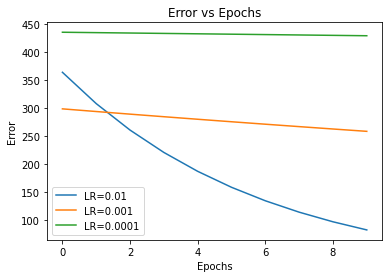

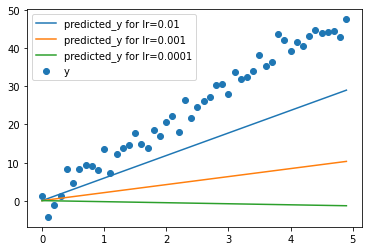

In [8]:
w1,j1 = train_by_GD(X,y,10,lr=0.01)
w2,j2 = train_by_GD(X,y,10,0.001)
w3,j3 = train_by_GD(X,y,10,0.0001)

yp1 = X@w1
yp2 = X@w2
yp3 = X@w3

ep = range(10)
plt.plot(ep,j1,label = 'LR=0.01')
plt.plot(ep,j2,label='LR=0.001')
plt.plot(ep,j3,label='LR=0.0001')
plt.title("Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(loc=0)
plt.show()

plt.scatter(X,y,label='y')
plt.plot(X,yp1,label='predicted_y for lr=0.01',)
plt.plot(X,yp2,label='predicted_y for lr=0.001')
plt.plot(X,yp3,label='predicted_y for lr=0.0001')
plt.legend(loc=0)
plt.show()

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [4]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  data = tf.keras.datasets.cifar10
  (x_train,y_train),(x_test,y_test) = data.load_data()

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [5]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(7200,activation='relu'),
    tf.keras.layers.Dense(2304,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_class,activation='softmax')
  ])


  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [6]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_class,activation='softmax')
  ])
  return model

### Compile and train the fully connected neural network model using the above functions.

In [7]:
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
# plt.imshow(x_train[0])
# plt.imshow(x_train[1000])
print(x_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)


Epoch 1/10
98/98 [==============================] - 4s 40ms/step - loss: 1941.1301 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 4s 38ms/step - loss: 35.2541 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 4s 38ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 4s 38ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 4s 39ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 4s 39ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 4s 39ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/1

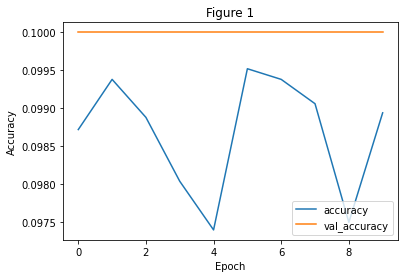

In [14]:

model = build_fc_model()
model.compile(optimizer= 'rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
plt.title("Figure 1")
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 2s 16ms/step - loss: 5.9382 - accuracy: 0.1979 - val_loss: 2.0101 - val_accuracy: 0.2807
Epoch 2/10
98/98 [==============================] - 1s 14ms/step - loss: 1.9040 - accuracy: 0.3306 - val_loss: 2.0134 - val_accuracy: 0.2937
Epoch 3/10
98/98 [==============================] - 1s 14ms/step - loss: 1.6549 - accuracy: 0.4184 - val_loss: 1.6090 - val_accuracy: 0.4411
Epoch 4/10
98/98 [==============================] - 1s 14ms/step - loss: 1.5067 - accuracy: 0.4772 - val_loss: 1.4140 - val_accuracy: 0.5075
Epoch 5/10
98/98 [==============================] - 1s 14ms/step - loss: 1.3809 - accuracy: 0.5197 - val_loss: 1.4495 - val_accuracy: 0.4958
Epoch 6/10
98/98 [==============================] - 1s 14ms/step - loss: 1.2903 - accuracy: 0.5500 - val_loss: 1.3197 - val_accuracy: 0.5464
Epoch 7/10
98/98 [==============================] - 1s 14ms/step - loss: 1.2155 - accuracy: 0.5791 - val_loss: 1.3345 - val_accuracy: 0.5410
Epoch 8/10
98

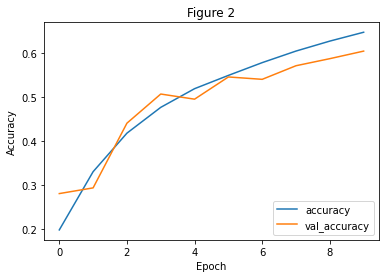

In [15]:
model = build_cnn_model(x_train[0].shape)
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
plt.title("Figure 2")
model.summary()

Epoch 1/20
98/98 [==============================] - 2s 17ms/step - loss: 3.9599 - accuracy: 0.2187 - val_loss: 1.9122 - val_accuracy: 0.3133
Epoch 2/20
98/98 [==============================] - 1s 14ms/step - loss: 1.7687 - accuracy: 0.3673 - val_loss: 1.6262 - val_accuracy: 0.4221
Epoch 3/20
98/98 [==============================] - 1s 14ms/step - loss: 1.5309 - accuracy: 0.4572 - val_loss: 1.6627 - val_accuracy: 0.4165
Epoch 4/20
98/98 [==============================] - 1s 14ms/step - loss: 1.3921 - accuracy: 0.5103 - val_loss: 1.4321 - val_accuracy: 0.5043
Epoch 5/20
98/98 [==============================] - 1s 14ms/step - loss: 1.2836 - accuracy: 0.5516 - val_loss: 1.4915 - val_accuracy: 0.4787
Epoch 6/20
98/98 [==============================] - 1s 15ms/step - loss: 1.1940 - accuracy: 0.5840 - val_loss: 1.3057 - val_accuracy: 0.5480
Epoch 7/20
98/98 [==============================] - 1s 14ms/step - loss: 1.1316 - accuracy: 0.6083 - val_loss: 1.3397 - val_accuracy: 0.5470
Epoch 8/20
98

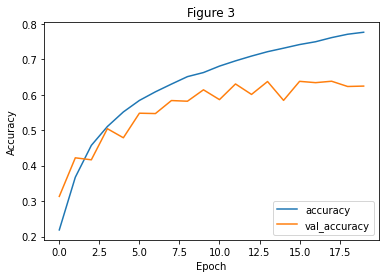

In [16]:
model = build_cnn_model(x_train[0].shape)
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
plt.title("Figure 3")
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [19]:
print("The CNN model is much better as compared to the fc model. ")
print("Comparing Figure 1 and Figure 2, we see that the accuracy of the fc model is approximately 10 % while that of the CNN model is 66 %.")
print()
print("Comparing Figure 2 and Figure 3, we see that increasing the number of epochs from 10 to 20 leads to overfitting in the CNN model")



The CNN model is much better as compared to the fc model. 
Comparing Figure 1 and Figure 2, we see that the accuracy of the fc model is approximately 10 % while that of the CNN model is 66 %.

Comparing Figure 2 and Figure 3, we see that increasing the number of epochs from 10 to 20 leads to overfitting in the CNN model
